# Clusterização com K-Means

A técnica de clusterização faz parte do aprendizado não supervisionado, conhecida como analise de agrupamento. Para rotular dados não rotulados que tem caracteristicas semelhantes existe varios algoritmos de clusterização dentre o mais popular temos o K-means.

>O K-Mens é **Definido** como um algoritmo não hierarquico de análise de clusters K-Means, com o objetico de agrupar dados em k clusters diferentes.

>O algoritmo K-means se caracteriza pela separação dos dados em k clusters, de acordo com as distâncias calculadas entre os dados e os centróides de cada cluster.

>O K-means é um algoritmo de clusterização, que busca minimizar a soma do erro quadrático ao criar os clusters.



## Centróide

Um **centróide de um cluster** representa um centro de um clusters e é obtido pelo valor médio dos dados que estão dentro desse cluster, assim o *algoritmo k-means encotra iterativamente o centroide de cada cluster atráves de uma medidad e distância* de  forma que cada cluster possui os dado cuja distãncia entre eles e o centróide seja mínima.

>O algoritmo de clustering K-means, realiza sucessivas iterações sobre os dados, calculando o centróide de cada cluster, de forma que cada cluster contenha os dados cuja distância entre eles e o centróide seja mínima.

### Etapas do algoritmo

1. Dividir os dados em k grupos com centróides criadas aleatoriamente

2. *Repita os itens abaixo até que as condições sejam satisfeita:*

    3. Calcule a distância de cada objeto ao centróide

    4. Atribuir o objeto para o grupo com menor distância ao centróide

    5. Atualize o centróide de cada grupo

**Figura 1** - Representação dos passos do algoritmo

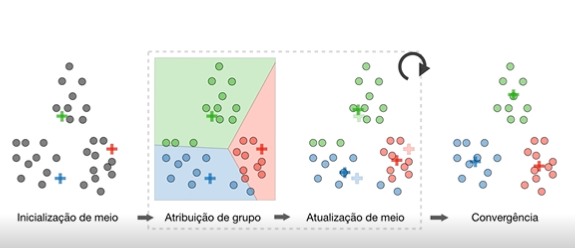

Fonte: Lead Dell

Na etapa 1, é criado os centroides por meio dos grupos com "+" e suas cores. Na etapa 2, é atribuido os dados aos grupos, ou seja, as centroides, perceba que existe dados que estão relacionados com mais de um grupo. Na etapa 3, é atualizado os grupos por meio da atualização dos centroides, fazendo com que os centros dos grupos se mude. Por fim, ocorre a convergencia dos dados e os grupos estão bem divididos.

### Método de parada

>O algoritmo realizara esses passos até que uma condição de parada, chamado de **convergência dos dados**, seja satisfeita. Pode ser representada pela **SSE - soma do erro quadratico**, que significa a soma das diferenças ao quadrado entre cada observação e a média do grupo em um conjunto de dados.

**Figura 2** - SUM OF SQUARED ERRORS (SSE)

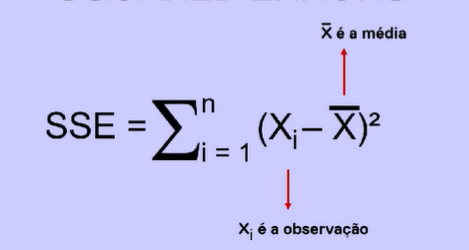

Fonte: Lead Dell

### Método para escolha K

O valor de K é escolhido usando o método **ELBOM**, conhecido como método do cotovelo já que a curva formada lembra de um cotovelo. Esse método, consiste em plotar a variânca dos dados em função do número de clusters, assim quando os valores de k crescem e os valores de variânca não mudam de forma significativa esse ponto é a melhor escolha de K.

>Um dos métodos mais populares usados para escolher um valor k, para o número de clusters, é o método Elbow, que consiste em plotar uma curva da variância dos dados, versus o número de clusters

**Figura 3** - Curva do valor de k pelo método Elbom 

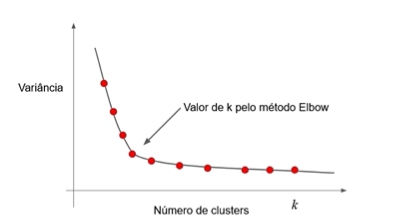

Fonte: Lead Dell

## Algoritmo K-Means

A base de dados é composta de dados representando informações basicas dos cliente de um shopping. A ideia é usar o algritmo de K-Means para identificar possíveis grupos de clientes.

### Base de dados

A atributos com a identificação do cliente, gênero do cliente, idade do cliente, renda anual do cliente multiplicado por mil e o scores de (1 a 100) atribuido ao cliente de acordo com o comportamento de compra.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pegando os dados
df = pd.read_csv('Mall_Customers.csv')
df.head()
df.shape

(200, 5)

In [3]:
# verificar se tem dados nulos
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# informações estatísticas da base de dados
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


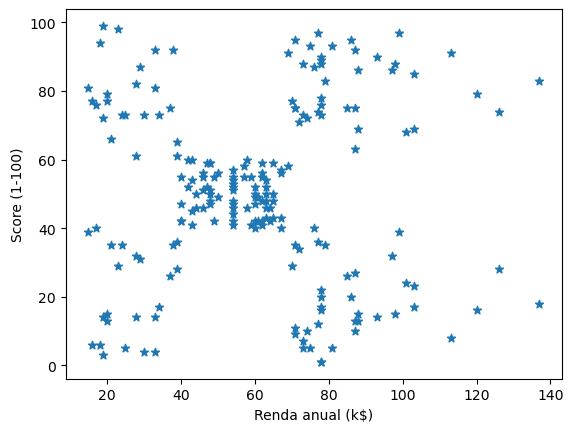

In [7]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], marker='*' )
plt.xlabel('Renda anual (k$)')
plt.ylabel('Score (1-100)')
plt.show()

In [15]:
# Selecionando dados para agrupamento
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [16]:
X.shape

(200, 2)

In [12]:
# Importando K-means
from sklearn.cluster import KMeans

n_clusters numero de k clustes e init é a inicialização padrao.

In [25]:
modelo_kmeans = KMeans(n_clusters=5,init='k-means++')
y_kmeans = modelo_kmeans.fit_predict(X)
print(y_kmeans)

c:\Users\mathe\anaconda3\envs\ambiente\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [23]:
# Visualização do primeiro grupo
print(X[y_kmeans == 0])

     Annual Income (k$)  Spending Score (1-100)
43                   39                      61
46                   40                      55
47                   40                      47
48                   40                      42
49                   40                      42
..                  ...                     ...
121                  67                      40
122                  69                      58
126                  71                      35
132                  72                      34
142                  76                      40

[81 rows x 2 columns]


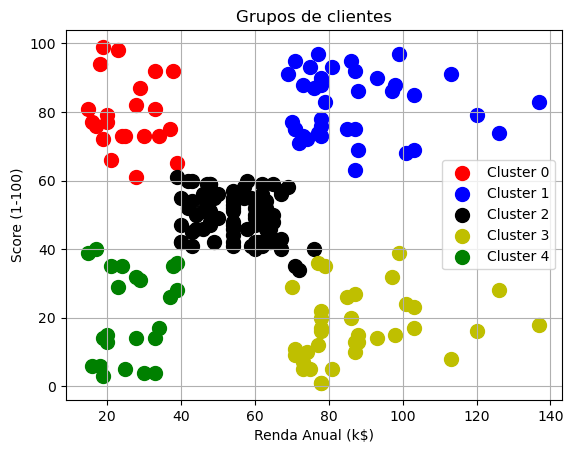

In [26]:
# visualizando todos os grupos
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = X[y_kmeans == k]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                s = 100, c = cores[k], label = f'Cluster {k}')


plt.title('Grupos de clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()